In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path="E:\\Myworks\\Elevate Labs\\Data\\titantic\\gender submission.csv"

In [3]:
gender=pd.read_csv(file_path)
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
file_path="E:\\Myworks\\Elevate Labs\\Data\\titantic\\test.csv"
test=pd.read_csv(file_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
file_path="E:\\Myworks\\Elevate Labs\\Data\\titantic\\train.csv"
train=pd.read_csv(file_path)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
gender.info()
gender.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [74]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


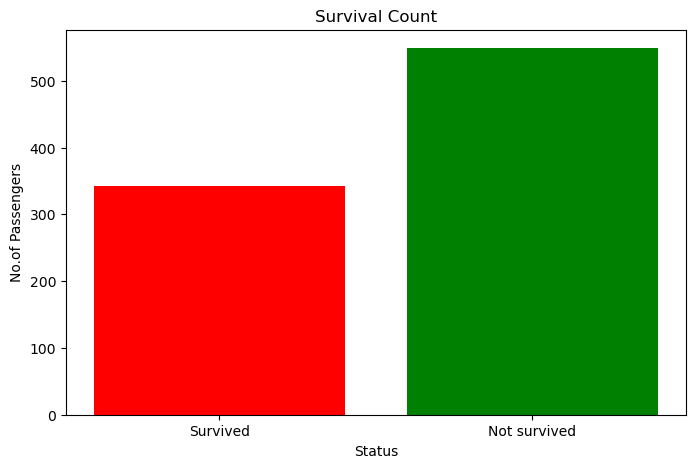

In [15]:
#survival count
survive_count=train["Survived"].value_counts()
not_survive=survive_count[0]
survived=survive_count[1]
plt.figure(figsize=(8,5),dpi=100)
plt.title("Survival Count")
plt.xlabel("Status")
plt.ylabel("No.of Passengers")
colors=['r','g']
plt.bar(['Survived','Not survived'],[survived,not_survive],color=colors)
plt.show()

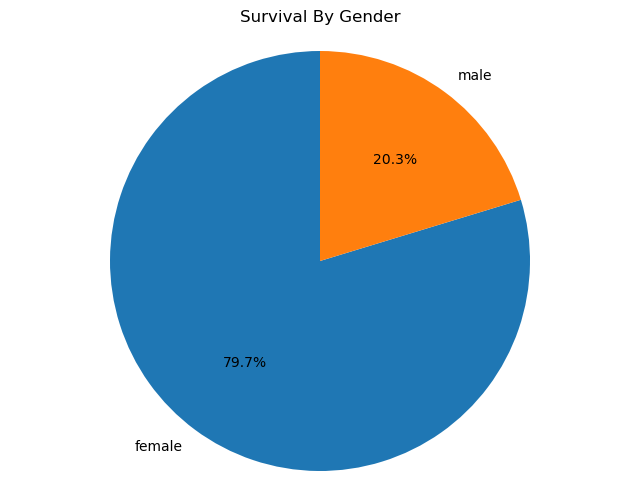

In [17]:
#survival rate by gender
survival_by_gender=train.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8,6))
plt.pie(survival_by_gender,labels=survival_by_gender.index,autopct="%1.1f%%",startangle=90)
plt.axis('equal')
plt.title("Survival By Gender")
plt.show()

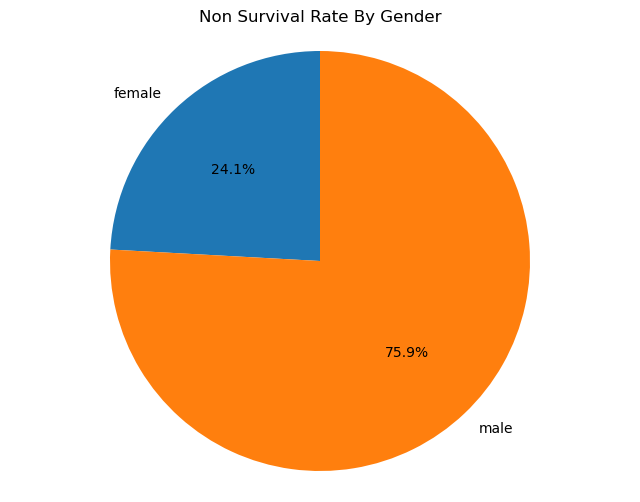

In [19]:
#Non Survival Rate By Gender
non_survival_by_gender=1-survival_by_gender

plt.figure(figsize=(8,6))
plt.pie(non_survival_by_gender,labels=survival_by_gender.index,autopct="%1.1f%%",startangle=90)
plt.axis('equal')
plt.title("Non Survival Rate By Gender")
plt.show()

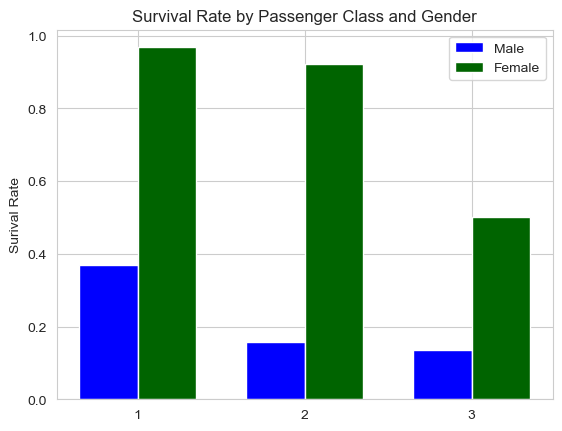

In [25]:
#CLUSTERED BAR CHART
#survival rate by passenger class
survival_by_class=train.groupby(['Pclass','Sex'])['Survived'].mean().unstack()

labels=survival_by_class.index.astype(str).tolist()
male_rates=survival_by_class['male'].tolist()
female_rates=survival_by_class['female'].tolist()

x = np.arange(len(labels))
width=0.35

fig,ax=plt.subplots()
ax.bar(x - width/2, male_rates, width, label='Male', color='blue')
ax.bar(x + width/2, female_rates, width, label='Female', color='darkgreen')


ax.set_ylabel('Surival Rate')
ax.set_title('Survival Rate by Passenger Class and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

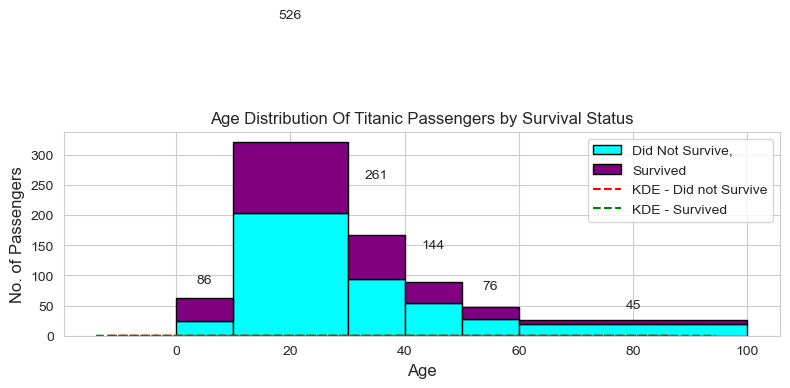

In [27]:
#histogram
#Age distribution
sns.set_style("whitegrid")


ages_survived=train[train['Survived']==1]['Age'].dropna()
ages_not_survived=train[train['Survived']==0]['Age'].dropna()

bins=[0,10,30,40,50,60,100]
plt.figure(figsize=(8,5),dpi=100)


counts, bin_edges, patches=plt.hist([ages_not_survived,ages_survived],bins=bins,stacked=True,
         label=['Did Not Survive,','Survived'],
        color=['cyan','purple'],edgecolor='black')

sns.kdeplot(ages_not_survived,color='red',linestyle='--',label='KDE - Did not Survive')
sns.kdeplot(ages_survived,color='green',linestyle='--',label='KDE - Survived')

plt.title('Age Distribution Of Titanic Passengers by Survival Status',fontsize=12)
plt.xlabel('Age',fontsize=12)
plt.ylabel('No. of Passengers',fontsize=12)

plt.legend()

for i in range(len(bins)-1):
    total= int(counts[0][i]+counts[1][i])
    plt.text((bins[i]+bins[i+1])/2,total+1,str(total),ha='center',fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\fajar\AppData\Local\Temp\ipykernel_17504\1340185410.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare_log', data=train, palette="Set2")


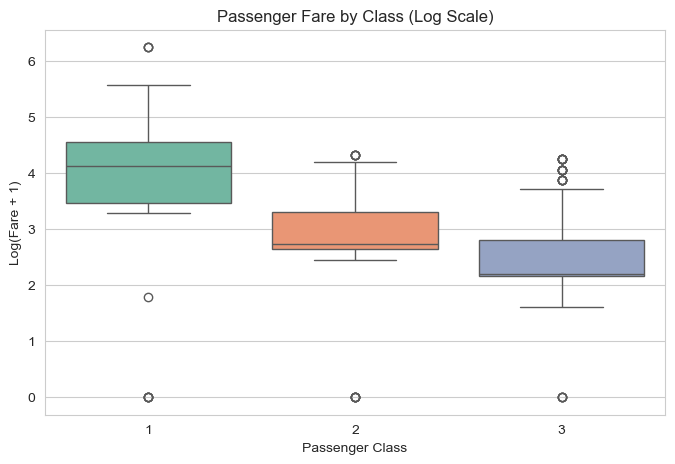

In [157]:
#boxplot
train['Fare_log'] = np.log1p(train['Fare'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare_log', data=train, palette="Set2")
plt.title("Passenger Fare by Class (Log Scale)")
plt.xlabel("Passenger Class")
plt.ylabel("Log(Fare + 1)")
plt.show()

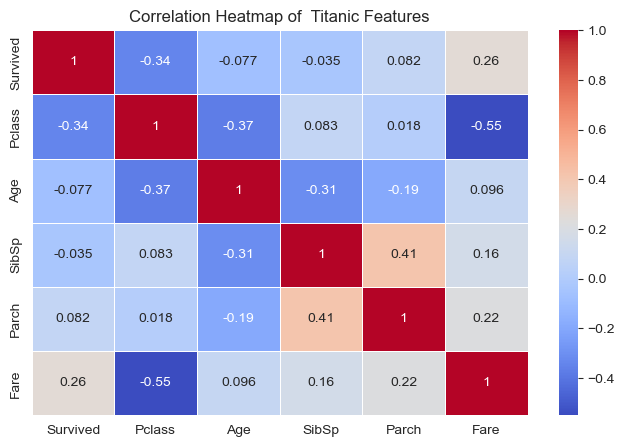

In [29]:
#heatmap
corr_features= train[['Survived','Pclass','Age','SibSp','Parch','Fare'	]]
corr_matrix=corr_features.corr()
plt.figure(figsize=(8,5),dpi=100)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title("Correlation Heatmap of  Titanic Features")
plt.show()

C:\Users\fajar\AppData\Local\Temp\ipykernel_18792\2744067089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_features.dropna(inplace=True)
C:\Users\fajar\AppData\Local\Temp\ipykernel_18792\2744067089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_features['Sex']=pairplot_features['Sex'].map({'male':0,'female':1})


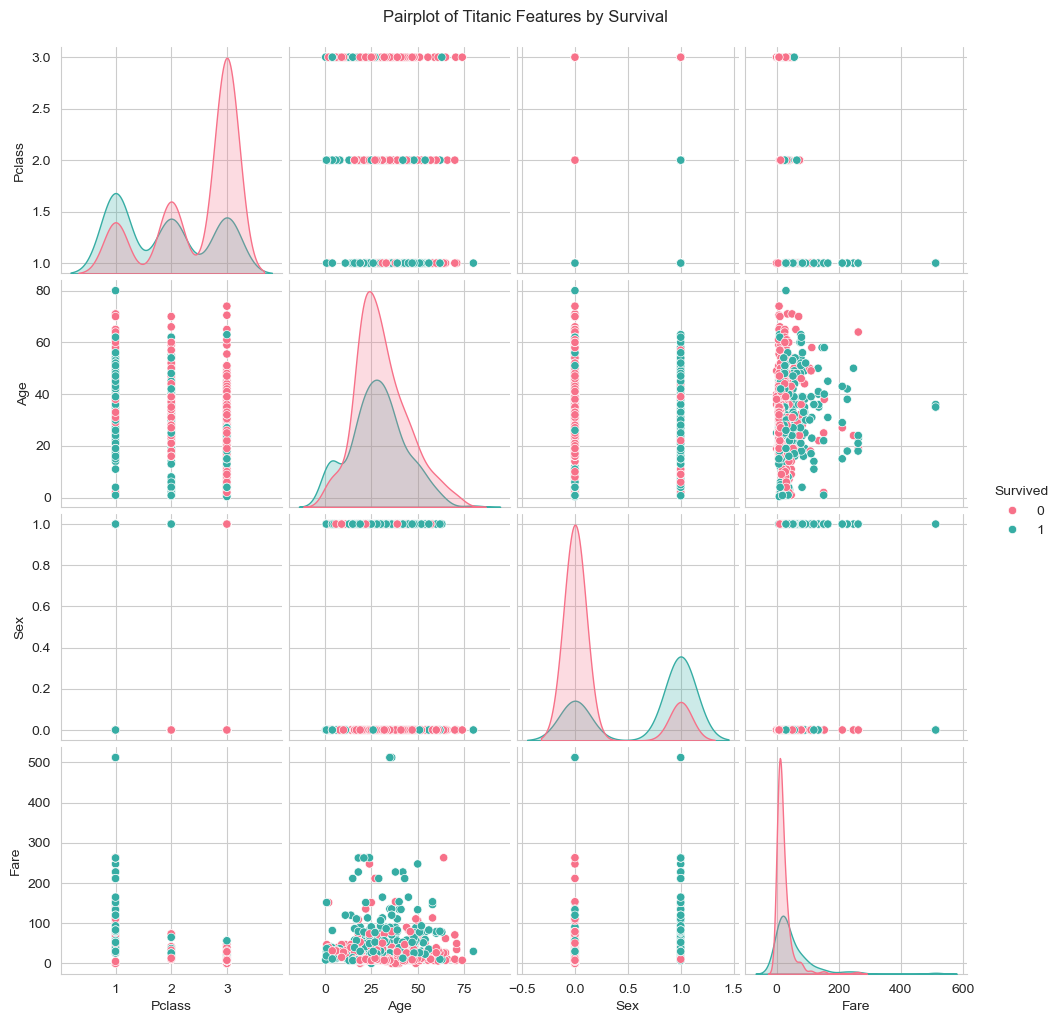

In [71]:
#PAIRPLOT
pairplot_features=train[['Survived','Pclass','Age','Sex','Fare'	]]
pairplot_features.dropna(inplace=True)
pairplot_features['Sex']=pairplot_features['Sex'].map({'male':0,'female':1})

sns.pairplot(pairplot_features,hue='Survived',diag_kind='kde',palette='husl')
plt.suptitle("Pairplot of Titanic Features by Survival",y=1.02)
plt.show()

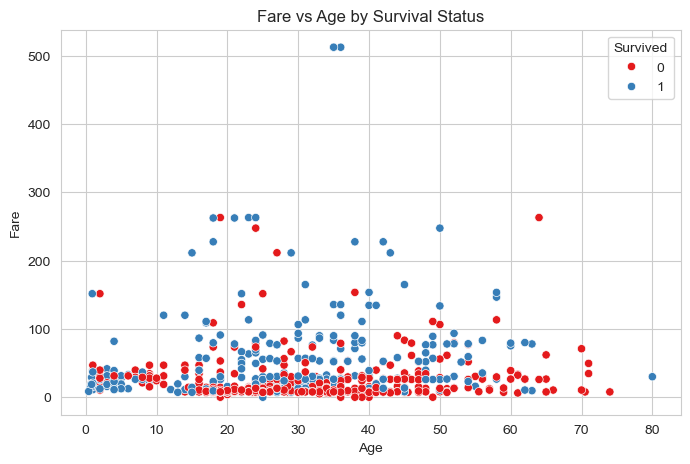

In [69]:
#scatterplot
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(data=train,x='Age',y='Fare',hue='Survived',palette='Set1')
plt.title("Fare vs Age by Survival Status")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title="Survived")
plt.grid(True)
plt.show()

###  Summary of Insights


- **Survival rates** were significantly higher among females and passengers in **1st class**.
- **Younger passengers** tended to survive more than older ones.
- **Fare** had a weak positive correlation with **survival** — higher fare, better chance of survival.
- Strong **negative correlation** between `Pclass` and `Fare` (lower class tickets were cheaper).
- `pairplot` and `scatterplot` helped identify patterns between age, fare, and survival visually.

These insights give a clear understanding of survival trends in the Titanic dataset.


### Interview Questions – Answers

**1. What is EDA and why is it important?**  
Exploratory Data Analysis (EDA) helps uncover trends, anomalies, relationships, and structure in data before modeling. It’s essential to understand what your dataset contains and how to clean or manipulate it.

**2. Which plots do you use to check correlation?**  
`heatmap()` to visualize numeric correlations and `pairplot()` for pairwise relationships.

**3. How do you handle skewed data?**  
Using transformations like log, square root, Box-Cox, or categorizing values into bins. Skewed data can impact models and must be handled.

**4. How to detect multicollinearity?**  
With a correlation matrix (via heatmap) or using VIF (Variance Inflation Factor). Multicollinearity inflates variance and affects interpretability.

**5. What are univariate, bivariate, and multivariate analyses?**  
- **Univariate:** Single variable (e.g., distribution of Age)  
- **Bivariate:** Two variables (e.g., Survival vs Sex)  
- **Multivariate:** More than two (e.g., Age vs Fare vs Survival using scatterplot)

**6. Difference between heatmap and pairplot?**  
- `heatmap`: Color-coded matrix of correlations  
- `pairplot`: Grid of scatterplots and histograms showing pairwise relationships

**7. How do you summarize your insights?**  
By writing observations after each visualization and wrapping up with a final summary section that lists clear trends or findings.
ary of patterns found.
